<h2> Part h <h2>

In [96]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def polynomial_features(x, p,intercept=False):

    """ 
    Generates a polynomial feature matrix with or without
    intercept, based on the values of x. 

    Returns
    -------
    X : numpy vector shape(n,p), if intercept shape(n,p+1)
        the resulting feature matrix of all polynomial combinations
        up to a given degree. Vandermonde format.
    

    Parameters
    ----------
    x : numpy vector shape(n)
        x values from dataset

    p : int
        number of degrees 

    intercept : Bool
        Bool to determine if intercept should be included or not:
        False : no intercept 
        True : include intercept
    """
    
    n = len(x)

    #handling the intercept column
    #to avoid branching in loop
    if intercept: 
        matrix_p = p+1
        start_col = 1
        i_offs = 0

        X = np.zeros((n, matrix_p))
        X[:,0] = np.ones(n)
   
    else:
        matrix_p = p
        start_col = 0
        i_offs = 1
    
        X = np.zeros((n, matrix_p))
    
    for i in range(start_col,matrix_p):
            X[:,i] = np.power(x,i+i_offs)
     
    return X

In [98]:
def OLS_parameters(X, y):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method.  

        Theta_OLS = inv(X.T @ X) @ X.T @ y

        Returns
        -------
        theta : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """

    #calculate X^T*X and take the inverse
    XTX = X.T@X
    XTX_i = np.linalg.inv(XTX)

    #calculate X^T*y
    XT_y = X.T @ y
   
    # calculate theta
    theta = XTX_i @ XT_y

    return theta

In [99]:
def Ridge_parameters(X, y, lamb):
    """
        Calculates the optimal parameters, r_params, using the 
        ridge regression method.  

        r_params = inv(X.T @ X + lambda I) @ X.T @ y

        Returns
        -------
        r_params : numpy array shape (n)
            the optimal parameters, theta as given by the
            Ridge regression method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """
        
    # Assumes X is scaled and has no intercept column    
    
    p = X.shape[1]
    I = np.eye(p)

    r_params = np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y

    return r_params

In [100]:
def gradient_descent_ridge(X,y,eta,lam,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ridge regression and gradient descent

        Returns
        -------
        theta_gdRidge : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """

    # Initialize weights for gradient descent
    theta_gdRidge = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for Ridge
        grad_Ridge = (2.0/n) * X.T @(X @ theta_gdRidge - y) + 2*lam*theta_gdRidge

        # Update parameters theta
        theta_gdRidge -= eta*grad_Ridge 

    # After the loop, theta contains the fitted coefficients
    return theta_gdRidge

In [101]:
def gradient_descent_OLS(X,y,eta,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method and gradient descent

        Returns
        -------
        theta_gdOLS : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """
    
    # Initialize weights for gradient descent
    theta_gdOLS = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for OSL and Ridge
        grad_OLS = (2.0/n)*X.T @ (X @ theta_gdOLS - y)

        # Update parameters theta
        theta_gdOLS -= eta*grad_OLS

    # After the loop, theta contains the fitted coefficients
    return theta_gdOLS

In [102]:
# define the Runge function

def runge_function(x):
    """
        The Runge function, f(x) = 1/(1+25*x^2)

        Returns
        -------
        f : numpy array shape (n)
            the Runge function evaluated at each point in x

        Parameters
        ----------
        x : numpy array shape (n)
            x values from dataset
    """

    f = 1/(1+25*x**2) 

    return f

Linear Regression - Average MSE: 0.0197, Average R²: 0.6551
Ridge Regression - Average MSE: 0.0202, Average R²: 0.6843
Lasso Regression - Average MSE: 0.0189, Average R²: 0.6774


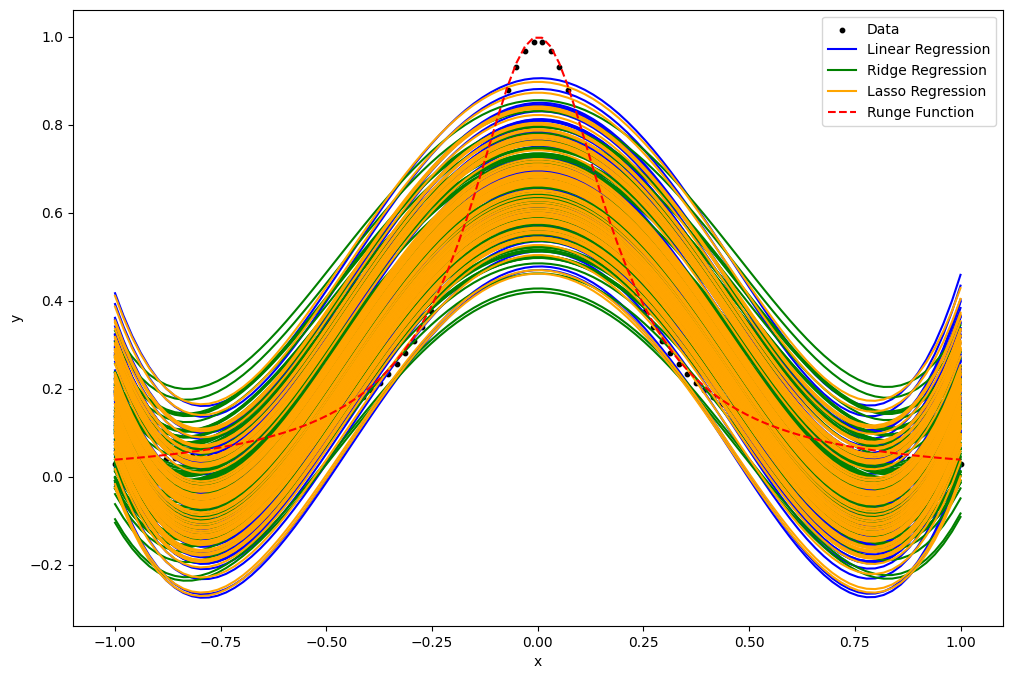

In [ ]:


# generate data
np.random.seed(2025)
n_samples = 100
x = np.linspace(-1, 1, n_samples).reshape(-1, 1)
y = runge_function(x) + 0.1 * np.random.normal(size=n_samples)

# polyminale features

degree = 5
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(x)

# scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# set up k-fold cross-validation

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=2025)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.001)
}
results = {name: {'mse': [], 'r2': []} for name in models.keys()}

# perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name]['mse'].append(mse)
        results[name]['r2'].append(r2)

# print results
for name, metrics in results.items():
    avg_mse = np.mean(metrics['mse'])
    avg_r2 = np.mean(metrics['r2'])
    print(f"{name} - Average MSE: {avg_mse:.4f}, Average R²: {avg_r2:.4f}")
# plot results with fixed colors for each model and data
colors = {
    'Linear Regression': 'blue',
    'Ridge Regression': 'green',
    'Lasso Regression': 'orange',
    'Runge Function': 'red',
    'Data': 'black'
}

x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)

plt.figure(figsize=(12, 8))
plt.scatter(x, y if y.ndim == 1 else y[:, 0], color=colors['Data'], label='Data', s=10)
for name, model in models.items():
    y_plot = model.predict(X_plot_scaled)
    plt.plot(x_plot, y_plot, label=name, color=colors[name])
plt.plot(x_plot, runge_function(x_plot), label='Runge Function', linestyle='--', color=colors['Runge Function'])
plt.title('Model Predictions vs Runge Function')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.xlabel('x')
plt.ylabel('y')
plt.show()                           

Lasso Regression (alpha=0.0001) - MSE: 0.0129, R²: -0.1451
Lasso Regression (alpha=0.001) - MSE: 0.0119, R²: -0.0558
Lasso Regression (alpha=0.01) - MSE: 0.0104, R²: 0.0808
Lasso Regression (alpha=0.1) - MSE: 0.0168, R²: -0.4842
Lasso Regression (alpha=1) - MSE: 0.0321, R²: -1.8417


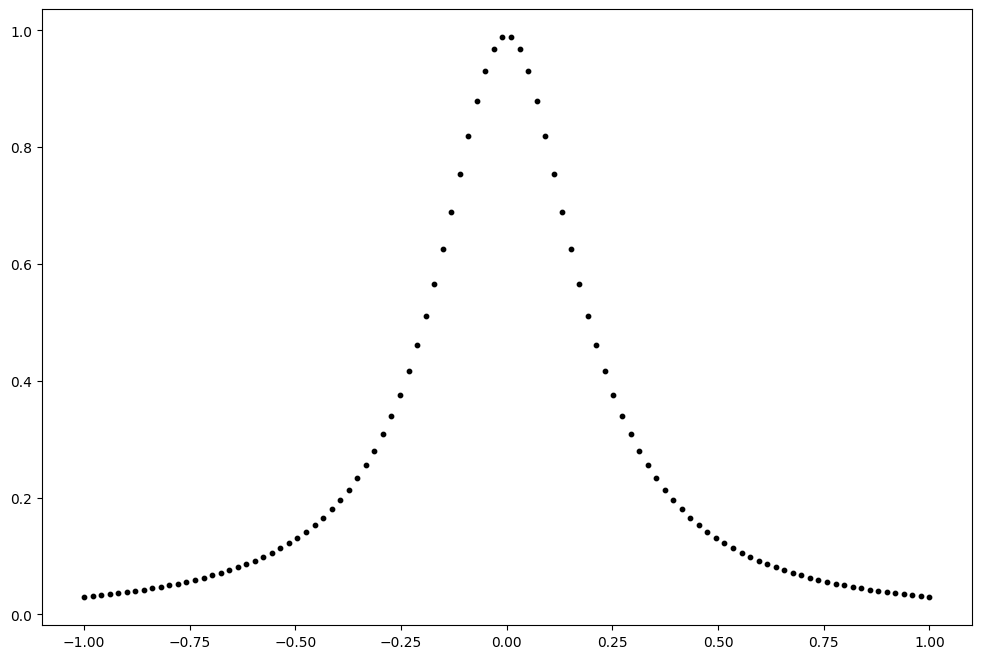

In [104]:
from sklearn.linear_model import Lasso
for a in [1e-4, 1e-3, 1e-2, 1e-1, 1]:
    model = Lasso(alpha=a, max_iter=10000)
    # kjør CV og print MSE / R2
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Lasso Regression (alpha={a}) - MSE: {mse:.4f}, R²: {r2:.4f}")
# plot results with fixed colors for each model and data
colors = {
    'Linear Regression': 'blue',
    'Ridge Regression': 'green',            
    'Lasso Regression': 'orange',
    'Runge Function': 'red',
    'Data': 'black'
}
x_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)
plt.figure(figsize=(12, 8))
plt.scatter(x, y if y.ndim == 1 else y[:, 0], color
=colors['Data'], label='Data', s=10)
for name, model in models.items():
    y_plot = model.predict(X_plot_scaled)

